<a href="https://colab.research.google.com/github/shahzaib-191/Rhombix-Technologies_Task-2/blob/main/RhombixTechnologies_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Titanic Survival Prediction System

## Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
## Step 2: Load Dataset
# Replace 'titanic.csv' and 'test.csv' with the actual paths if not in the current directory.
train_data = pd.read_csv("titanic.csv")

In [ ]:
## Step 3: Data Exploration and Cleaning
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop irrelevant features
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

<ipython-input-4-c470230f6dbb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-4-c470230f6dbb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
## Step 4: Feature Selection
# Define features (X) and target (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
## Step 5: Model Training
# Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
## Step 6: Model Evaluation
# Predictions
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[92 13]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
## Step 7: Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)



Feature Importances:
              Importance
Sex_male       0.257215
Fare           0.193356
PassengerId    0.191336
Age            0.170077
Pclass         0.081342
SibSp          0.045049
Parch          0.030228
Embarked_S     0.023361
Embarked_Q     0.008037


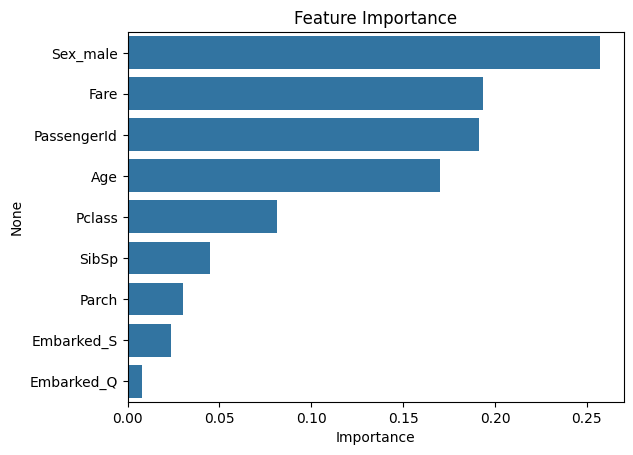

In [ ]:
## Step 8: Visualization (Optional)
# Visualize feature importance
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

In [ ]:
## Step 9: Save Model (Optional)
# Save the model for deployment if needed
import joblib
joblib.dump(model, 'titanic_survival_model.pkl')

['titanic_survival_model.pkl']